In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sqlite3
import os

C:\Users\Victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Função para ler arquivos CSV e inserir no banco de dados SQLite
def processar_pasta(pasta, conn):
    for arquivo in os.listdir(pasta):
        if arquivo.endswith('.csv'):
            caminho_arquivo = os.path.join(pasta, arquivo)
            nome_tabela = os.path.splitext(arquivo)[0]
            df = pd.read_csv(caminho_arquivo, encoding='latin1', sep=';')
            
            # Verificar se a coluna "CODES" existe antes da renomeação
            print(f'Antes da renomeação ({nome_tabela}):')
            print(df.head())
            if 'CODES' in df.columns:
                df.rename(columns={'CODES': 'CODESC'}, inplace=True)
            
            # Colocar os nomes das colunas em maiúsculo
            df.columns = df.columns.str.upper()

            df.to_sql(nome_tabela, conn, if_exists='replace', index=False)
            
            # Verificar se a coluna "CODES" existe depois da renomeação
            print(f'Depois da renomeação ({nome_tabela}):')
            print(df.head())

# Conectar ao banco de dados SQLite
conn = sqlite3.connect('test_analytics.db')

# Processar as pastas Escolas e Perfil dos educandos
pastas = ['Escolas', 'Perfil dos educandos']
for pasta in pastas:
    processar_pasta(pasta, conn)

# Fechar a conexão com o banco de dados
conn.close()


FileNotFoundError: [WinError 3] O sistema não pode encontrar o caminho especificado: 'Escolas'

In [6]:

# Conectar ao banco de dados
conn = sqlite3.connect('test_analytics.db')
cursor = conn.cursor()

# Consulta SQL
query = """
CREATE VIEW IF NOT EXISTS "escolas_alunos" AS 
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, SITUACAO, FX_ETARIA, LATITUDE, LONGITUDE, NULL AS ANO, NULL AS MODAL,  NULL AS SEXO, NULL AS DESCTURNO, NULL AS NEE, NULL AS IDADE, NULL AS RACA, NULL AS QTDE  FROM "escolas-dez-2010"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, SITUACAO, FX_ETARIA, LATITUDE, LONGITUDE, NULL AS ANO, NULL AS MODAL, NULL AS SEXO, NULL AS DESCTURNO, NULL AS NEE, NULL AS IDADE, NULL AS RACA , NULL AS QTDE FROM "escolas-dez-2011"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, SITUACAO, FX_ETARIA, LATITUDE, LONGITUDE, NULL AS ANO, NULL AS MODAL, NULL AS SEXO, NULL AS DESCTURNO, NULL AS NEE, NULL AS IDADE, NULL AS RACA  , NULL AS QTDE FROM "escolas-dez-2012"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, SITUACAO, FX_ETARIA, LATITUDE, LONGITUDE, NULL AS ANO, NULL AS MODAL, NULL AS SEXO, NULL AS DESCTURNO, NULL AS NEE, NULL AS IDADE, NULL AS RACA,  NULL AS QTDE  FROM "escolas-dez-2013"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, SITUACAO, FX_ETARIA, LATITUDE, LONGITUDE, NULL AS ANO, NULL AS MODAL, NULL AS SEXO, NULL AS DESCTURNO, NULL AS NEE, NULL AS IDADE, NULL AS RACA,  NULL AS QTDE  FROM "escolas-dez-2014"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, SITUACAO, FX_ETARIA, LATITUDE, LONGITUDE, NULL AS ANO, NULL AS MODAL, NULL AS SEXO, NULL AS DESCTURNO, NULL AS NEE, NULL AS IDADE, NULL AS RACA,  NULL AS QTDE  FROM "escolas-dez-2015"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, SITUACAO, FX_ETARIA, LATITUDE, LONGITUDE, NULL AS ANO, NULL AS MODAL, NULL AS SEXO, NULL AS DESCTURNO, NULL AS NEE, NULL AS IDADE, NULL AS RACA,  NULL AS QTDE  FROM "escolas122018"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, SITUACAO, FX_ETARIA, LATITUDE, LONGITUDE, NULL AS ANO, NULL AS MODAL, NULL AS SEXO, NULL AS DESCTURNO, NULL AS NEE, NULL AS IDADE, NULL AS RACA,  NULL AS QTDE  FROM "escolas122019"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, SITUACAO, FX_ETARIA, LATITUDE, LONGITUDE, NULL AS ANO, NULL AS MODAL, NULL AS SEXO, NULL AS DESCTURNO, NULL AS NEE, NULL AS IDADE, NULL AS RACA,  NULL AS QTDE  FROM "escolas122020"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, SITUACAO, FX_ETARIA, LATITUDE, LONGITUDE, NULL AS ANO, NULL AS MODAL, NULL AS SEXO, NULL AS DESCTURNO, NULL AS NEE, NULL AS IDADE, NULL AS RACA,  NULL AS QTDE  FROM "escolas122021"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, SITUACAO, FX_ETARIA, LATITUDE, LONGITUDE, NULL AS ANO, NULL AS MODAL, NULL AS SEXO, NULL AS DESCTURNO, NULL AS NEE, NULL AS IDADE, NULL AS RACA,  NULL AS QTDE  FROM "escolas122022"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, SITUACAO, FX_ETARIA, LATITUDE, LONGITUDE, NULL AS ANO, NULL AS MODAL,  NULL AS SEXO, NULL AS DESCTURNO, NULL AS NEE, NULL AS IDADE, NULL AS RACA,  NULL AS QTDE  FROM "escolas122023"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, SITUACAO, NULL AS FX_ETARIA, LATITUDE, LONGITUDE, NULL AS ANO, NULL AS MODAL, NULL AS SEXO, NULL AS DESCTURNO, NULL AS NEE, NULL AS IDADE, NULL AS RACA,  NULL AS QTDE  FROM "escolasr34"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, SITUACAO, NULL AS FX_ETARIA, LATITUDE, LONGITUDE, NULL AS ANO, NULL AS MODAL,  NULL AS SEXO, NULL AS DESCTURNO, NULL AS NEE, NULL AS IDADE, NULL AS RACA,  NULL AS QTDE  FROM "escolasr34dez2017"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, NULL AS SITUACAO, NULL AS FX_ETARIA,  NULL AS LATITUDE,  NULL AS LONGITUDE, ANO, MODAL, SEXO, DESCTURNO, NEE, IDADE, RACA, QTDE FROM "idadeserieneeraca-r33"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, NULL AS SITUACAO, NULL AS FX_ETARIA, NULL AS LATITUDE, NULL AS LONGITUDE, ANO, MODAL, SEXO, DESCTURNO, NEE, IDADE, RACA, QTDE FROM "idadeserieneeracadez17"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, NULL AS SITUACAO, NULL AS FX_ETARIA, NULL AS LATITUDE, NULL AS LONGITUDE, ANO, MODAL, SEXO, DESCTURNO, NEE, IDADE, RACA, NULL AS QTDE FROM "idadeserieneeracadez18"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, NULL AS SITUACAO, NULL AS FX_ETARIA, NULL AS LATITUDE, NULL AS LONGITUDE, ANO, MODAL, SEXO, DESCTURNO, NEE, IDADE, RACA, NULL AS QTDE FROM "idadeserieneeracadez19"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, NULL AS SITUACAO, NULL AS FX_ETARIA, NULL AS LATITUDE, NULL AS LONGITUDE, ANO, MODAL, SEXO, DESCTURNO, NEE, IDADE, RACA, QTDE FROM "idadeserieneeracadez20"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, NULL AS SITUACAO, NULL AS FX_ETARIA, NULL AS LATITUDE, NULL AS LONGITUDE, ANO, MODAL, SEXO, DESCTURNO, NEE, IDADE, RACA, QTDE FROM "idadeserieneeracadez21"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, NULL AS SITUACAO, NULL AS FX_ETARIA, NULL AS LATITUDE, NULL AS LONGITUDE, ANO, MODAL, SEXO, DESCTURNO, NEE, IDADE, RACA, QTDE FROM "idadeserieneeracadez22"
UNION ALL
SELECT CODESC AS CODE, NOMESC, TIPOESC, DISTRITO, NULL AS SITUACAO, NULL AS FX_ETARIA, NULL AS LATITUDE, NULL AS LONGITUDE, ANO, MODAL, SEXO, DESCTURNO, NEE, IDADE, NULL AS RACA, QTDE  FROM "idadeserieneeracadez23";

"""

# Executar a consulta
cursor.executescript(query)

# Confirmar a transação e fechar a conexão
conn.commit()
conn.close()


In [10]:



def create_connection():
    conn = None
    try:
        conn = sqlite3.connect('./test_analytics.db')
    except sqlite3.Error as e:
        pass
    return conn

# Função para executar a consulta SQL e recuperar os dados
def fetch_data(conn):
    if conn is not None:
        try:
            # Executar a consulta SQL para recuperar os dados desejados
            query = "SELECT * FROM escolas_alunos"
            df = pd.read_sql(query, conn)
            return df
        except sqlite3.Error as e:
            pass
    else:
        print('Sem conexão com o banco de dados.')

# Estabelecer conexão com o banco de dados
conn = create_connection()

# Recuperar dados do banco de dados
dados = fetch_data(conn)





##  Organizar os Index 


In [11]:
dados.index.value_counts()

0          1
2031194    1
2031185    1
2031186    1
2031187    1
          ..
1015597    1
1015598    1
1015599    1
1015600    1
3046785    1
Length: 3046786, dtype: int64

## Dados duplicados da Base

In [12]:
dados.duplicated().sum()

738322

## Avaliando os Missing

In [13]:
dados.isnull().sum()

CODE               0
NOMESC             0
TIPOESC            0
DISTRITO        1208
SITUACAO     2982929
FX_ETARIA    3023892
LATITUDE     2984633
LONGITUDE    2984633
ANO            63857
MODAL          86281
SEXO           64378
DESCTURNO      63857
NEE            63857
IDADE          64360
RACA          242523
QTDE          883707
dtype: int64

<Axes: >

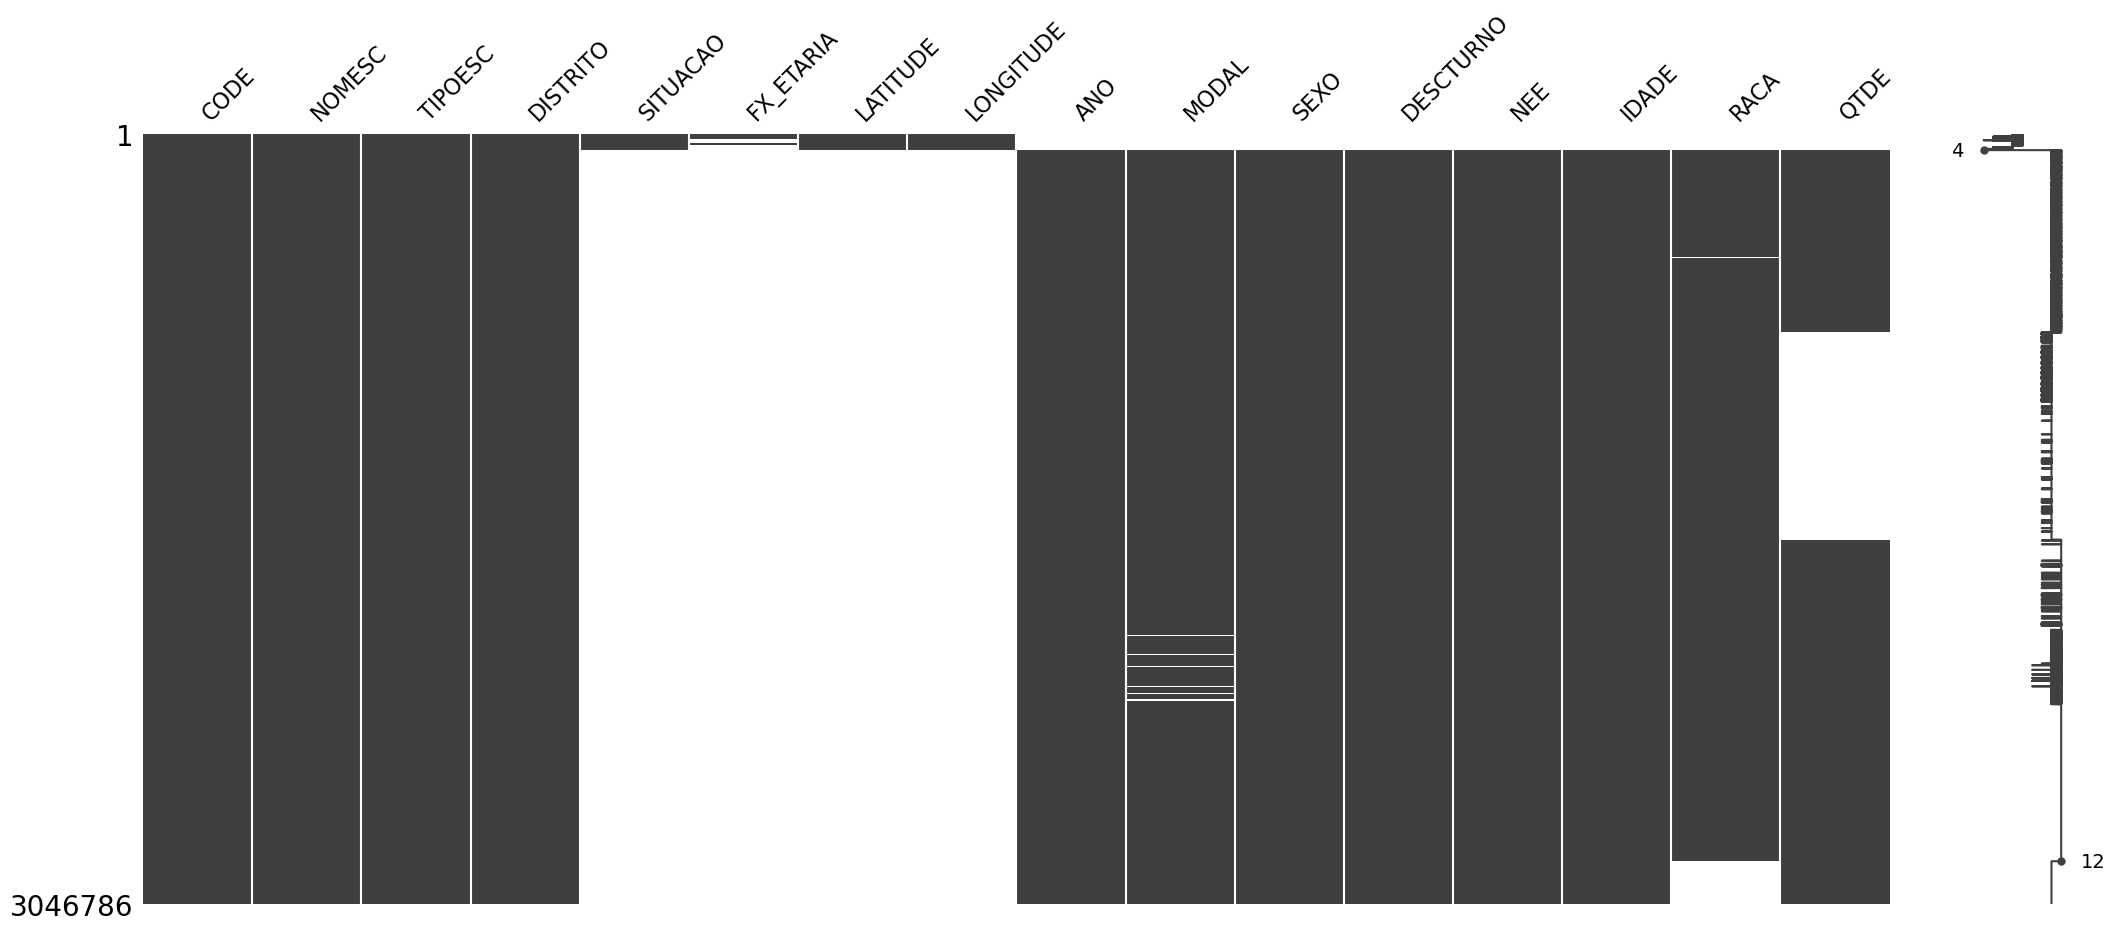

In [14]:
msno.matrix(dados)

## Estatísticas descritivas

In [15]:
dados.describe().round(0)

,CODE,ANO,IDADE,QTDE
count,3046786.0,2982929.0,2982426.0,2163079.0
mean,203684.0,2020.0,13.0,3.0
std,198835.0,2.0,15.0,5.0
min,86.0,2016.0,0.0,1.0
25%,19691.0,2019.0,4.0,1.0
50%,94897.0,2019.0,9.0,1.0
75%,308669.0,2022.0,14.0,3.0
max,800812.0,2023.0,123.0,524.0


## Tratamento da Base 

In [16]:
dados['SITUACAO'] = dados['SITUACAO'].str.upper()

In [17]:
valores_unicos= dados['DESCTURNO'].unique()
print(valores_unicos)

[None 'Tarde' 'Manhã' 'Intermediário' 'Noite' 'Integral' 'Vespertino'
 'Tarde               ' 'ManhÃ\x83Â£               '
 'Noite               ' 'Integral            '
 'IntermediÃ\x83Â¡rio       ' 'Vespertino          '
 'ManhÃ£               ' 'IntermediÃ¡rio       ']


In [18]:
dados['DESCTURNO'].isin(['Tarde               ', 'ManhÃ\x83Â£               ', 'Noite               ', 'Integral            ', 'IntermediÃ\x83Â¡rio       ', 'Vespertino          ', 'ManhÃ£               ', 'IntermediÃ¡rio       '])

0          False
1          False
2          False
3          False
4          False
           ...  
3046781    False
3046782    False
3046783    False
3046784    False
3046785    False
Name: DESCTURNO, Length: 3046786, dtype: bool

In [19]:
filtro = dados['DESCTURNO'].isin(['Tarde               ', 'ManhÃ\x83Â£               ', 'Noite               ', 'Integral            ', 'IntermediÃ\x83Â¡rio       ', 'Vespertino          ', 'ManhÃ£               ', 'IntermediÃ¡rio       '])

dados = dados.drop(dados[filtro].index)



In [20]:
VALORES_UNICOS_NEE =dados['NEE'].unique()
print(VALORES_UNICOS_NEE)

[None 'NAO POSSUI' 'DEF FISICA NÃO CADEIRANTE' 'AUTISMO'
 'DEFICIENCIA INTELECTUAL' 'SINDROME DE ASPERGER' 'DEF FISICA CADEIRANTE'
 'SURDEZ SEVERA/PROFUNDA' 'DEFICIENCIA MULTIPLA'
 'BAIXA VISAO/VISAO SUBNORMAL' 'SURDEZ LEVE/MODERADA'
 'ALTAS HABILIDADES/SUPERDOTACAO' 'TRANST DESINTEGRATIVO INFANCIA'
 'CEGUEIRA' 'SINDROME DE RETT' 'SURDOCEGUEIRA' 'DEFICIENCIA VISUAL'
 'SINDROME DE DOWN' 'PARALISIA CEREBRAL' 'VISAO MONOCULAR']


In [21]:

filtro2 = dados['NEE'].isin(['DEFICIENCIA FÃ\x83Â\x8dSICA CADEIRANTE', 'DEFICIENCIA FÃ\x8dSICA CADEIRANTE'])


dados = dados.drop(dados[filtro2].index)

## Box-plot

<Axes: xlabel='QTDE', ylabel='RACA'>

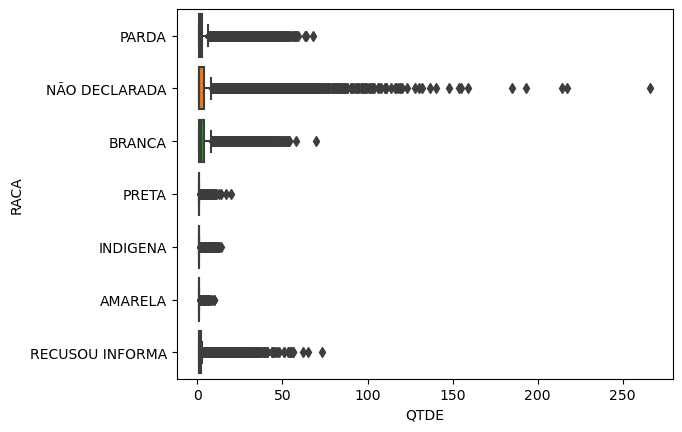

In [22]:
sns.boxplot(data=dados, x="QTDE", y="RACA")

<Axes: xlabel='SEXO', ylabel='IDADE'>

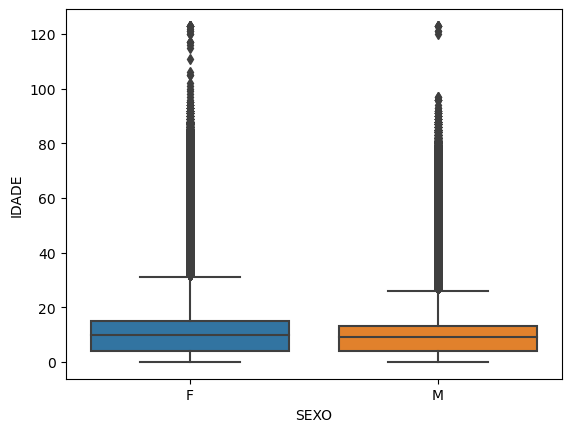

In [23]:
sns.boxplot(data=dados, x="SEXO", y="IDADE")

<Axes: xlabel='QTDE', ylabel='DESCTURNO'>

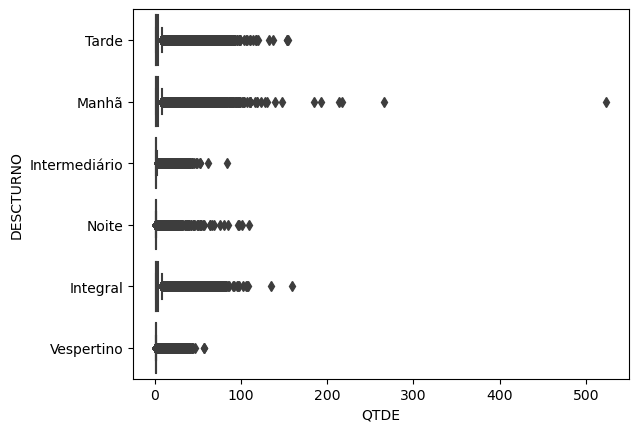

In [24]:
sns.boxplot(data=dados, x="QTDE", y="DESCTURNO")

<Axes: xlabel='IDADE', ylabel='RACA'>

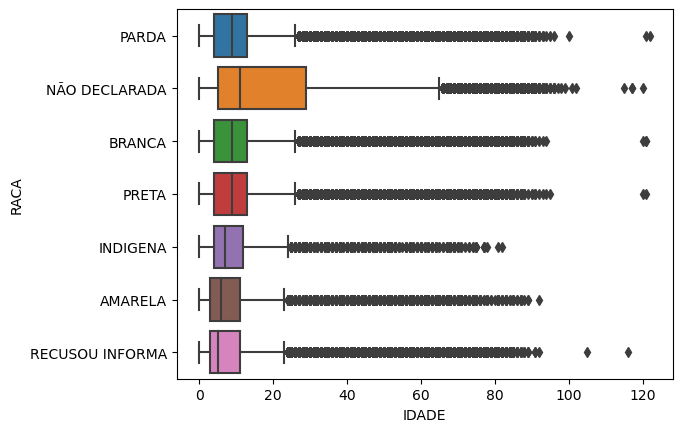

In [25]:
sns.boxplot(data=dados, x="IDADE", y="RACA")

## Gráfico de Dispersão

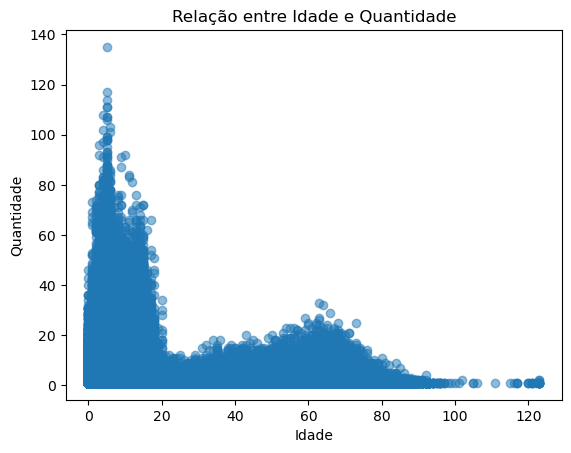

In [26]:
plt.scatter(dados['IDADE'], dados['QTDE'], alpha=0.5)
plt.title('Relação entre Idade e Quantidade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

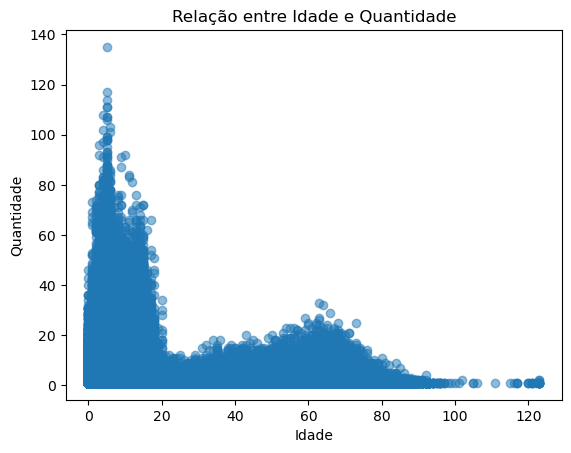

In [27]:
plt.scatter(dados['IDADE'], dados['QTDE'], alpha=0.5)
plt.title('Relação entre Idade e Quantidade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

## Análise dos Dados

In [28]:
agregado_distrito_sexo = dados.groupby(['DISTRITO', 'SEXO'])['QTDE'].sum()


agregado_distrito_sexo_ordenado = agregado_distrito_sexo.sort_values(ascending=False)


print(agregado_distrito_sexo_ordenado)


DISTRITO           SEXO
CIDADE TIRADENTES  F       147884.0
                   M       142319.0
CAPAO REDONDO      F       134911.0
                   M       132997.0
GRAJAU             M       129584.0
                             ...   
JARDIM PAULISTA    M         1404.0
ALTO DE PINHEIROS  F         1309.0
BARRA FUNDA        M         1297.0
JARDIM PAULISTA    F         1291.0
BARRA FUNDA        F         1238.0
Name: QTDE, Length: 192, dtype: float64


In [29]:
agregado_distrito_sexo = dados.groupby(['DISTRITO', 'SEXO'])['QTDE'].sum()

top_10_agregado_distrito_sexo = agregado_distrito_sexo.sort_values(ascending=False).head(10)

print(top_10_agregado_distrito_sexo)

DISTRITO           SEXO
CIDADE TIRADENTES  F       147884.0
                   M       142319.0
CAPAO REDONDO      F       134911.0
                   M       132997.0
GRAJAU             M       129584.0
BRASILANDIA        M       128313.0
                   F       126694.0
GRAJAU             F       125358.0
JARDIM ANGELA      M       122723.0
                   F       122552.0
Name: QTDE, dtype: float64


In [30]:
nee_por_distrito = dados.groupby(['DISTRITO', 'NEE']).size()

nee_por_distrito_ordenado = nee_por_distrito.groupby('DISTRITO').sum().sort_values(ascending=False)

print(nee_por_distrito_ordenado)

DISTRITO
CIDADE TIRADENTES    92045
CAPAO REDONDO        85406
BRASILANDIA          78330
JARAGUA              71820
JARDIM ANGELA        71630
                     ...  
ALTO DE PINHEIROS      976
REPUBLICA              908
MARSILAC               859
BARRA FUNDA            802
JARDIM PAULISTA        759
Length: 96, dtype: int64


In [23]:
contagem_modalidade_por_distrito = dados.groupby(['DISTRITO', 'MODAL']).size()

contagem_modalidade_por_distrito = contagem_modalidade_por_distrito.reset_index(name='COUNT')

modalidade_dominante_por_distrito = contagem_modalidade_por_distrito.loc[contagem_modalidade_por_distrito.groupby('DISTRITO')['COUNT'].idxmax()]

print(modalidade_dominante_por_distrito)

              DISTRITO   MODAL  COUNT
4            AGUA RASA    FUND   2768
10   ALTO DE PINHEIROS  CRECHE    739
16          ANHANGUERA    FUND   7707
28          ARICANDUVA    FUND   3717
38         ARTUR ALVIM    FUND   6398
..                 ...     ...    ...
886       VILA MARIANA  CONVEE   1583
895       VILA MATILDE    FUND   6671
904      VILA MEDEIROS  CRECHE   5761
914      VILA PRUDENTE  CRECHE   3879
924         VILA SONIA  CRECHE   5614

[96 rows x 3 columns]


In [24]:
dados_ativas_criadas = dados[(dados['SITUACAO'] == 'ATIVA') | (dados['SITUACAO'] == 'CRIADA')]

contagem_situacao_por_distrito = dados_ativas_criadas.groupby(['DISTRITO', 'SITUACAO']).size()

contagem_situacao_por_distrito = contagem_situacao_por_distrito.reset_index(name='COUNT')

contagem_situacao_por_distrito_ordenado = contagem_situacao_por_distrito.sort_values(by='COUNT', ascending=False)

print(contagem_situacao_por_distrito_ordenado)


              DISTRITO SITUACAO  COUNT
40   CIDADE TIRADENTES    ATIVA   2079
13         BRASILANDIA    ATIVA   2018
48              GRAJAU    ATIVA   1779
74     JARDIM SAO LUIS    ATIVA   1730
70       JARDIM ANGELA    ATIVA   1708
..                 ...      ...    ...
95         PARELHEIROS   CRIADA      1
93             MORUMBI   CRIADA      1
82           LIBERDADE   CRIADA      1
77      JOSE BONIFACIO   CRIADA      1
160         VILA SONIA   CRIADA      1

[161 rows x 3 columns]


In [98]:
alunos_por_distrito_ano = dados.groupby(['DISTRITO', 'ANO'])['QTDE'].sum().reset_index()

alunos_por_distrito_ano = alunos_por_distrito_ano.sort_values(by=['DISTRITO', 'ANO'])

alunos_por_distrito_ano['TAXA_DE_CRESCIMENTO'] = alunos_por_distrito_ano.groupby('DISTRITO')['QTDE'].pct_change()

distritos_mais_crescentes = alunos_por_distrito_ano.groupby('DISTRITO')['TAXA_DE_CRESCIMENTO'].mean().sort_values(ascending=False)

print(distritos_mais_crescentes)



DISTRITO
BARRA FUNDA          0.259995
JARDIM PAULISTA      0.183676
MARSILAC             0.154862
ALTO DE PINHEIROS    0.131959
BOM RETIRO           0.131166
                       ...   
CAMPO GRANDE        -0.069419
TUCURUVI            -0.072533
PINHEIROS           -0.097809
SANTANA             -0.109989
SANTO AMARO         -0.132134
Name: TAXA_DE_CRESCIMENTO, Length: 96, dtype: float64


In [99]:
distritos_mais_crescentes_rounded = distritos_mais_crescentes.round(2)

print(distritos_mais_crescentes_rounded)

DISTRITO
BARRA FUNDA          0.26
JARDIM PAULISTA      0.18
MARSILAC             0.15
ALTO DE PINHEIROS    0.13
BOM RETIRO           0.13
                     ... 
CAMPO GRANDE        -0.07
TUCURUVI            -0.07
PINHEIROS           -0.10
SANTANA             -0.11
SANTO AMARO         -0.13
Name: TAXA_DE_CRESCIMENTO, Length: 96, dtype: float64


In [ ]:
dados.columns

Index(['Unnamed: 0', 'CODE', 'NOMESC', 'TIPOESC', 'DISTRITO', 'SITUACAO',
       'FX_ETARIA', 'LATITUDE', 'LONGITUDE', 'ANO', 'MODAL', 'SEXO',
       'DESCTURNO', 'NEE', 'IDADE', 'RACA', 'QTDE'],
      dtype='object')